In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,time

In [2]:
address = pd.read_csv('address_data.csv') 
customers = pd.read_csv('customers_data.csv') 
ingredients = pd.read_csv('ingredients_data.csv') 
inventory = pd.read_csv('inventory_data.csv') 
item = pd.read_csv('item_data.csv')
orders = pd.read_csv('orders_data.csv')
recipe = pd.read_csv('recipe_data.csv') 
rota = pd.read_csv('rota_data.csv')  
shift = pd.read_csv('shift_data.csv') 
staff = pd.read_csv('staff_data.csv')

# Análisis de datos de pizzería
## información relevante que buscamos extraer de los datos.
### ⦾ Ventas y clientes
#### - ¿Quiénes son los clientes más frecuentes y cuánto gastan?
#### - ¿Cuáles son los productos más vendidos y cuánto dinero han generado?
#### - ¿Qué productos suelen comprarse juntos?
### ⦾ inventario y recetas
#### - ¿Qué artículos tienen más disponibilidad y cuáles necesitan reabastecerse?
#### - ¿Cuáles son los ingredientes más utilizados en las recetas y cuál es su coste en proporción al valor del producto?
### ⦾ Rendimiento del personal
#### - ¿Cómo varía el rendimiento del personal en los distintos días de la semana y turnos?
#### - ¿Cuáles son los costes laborales totales por turno?
### ⦾ Rentabilidad de la pizzería
#### - Ingresos totales en la pizzería. 
#### - Beneficios diarios, semanales y totales



# 

## Data Wrangling

In [3]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   add_id             113 non-null    int64 
 1   delivery_address1  113 non-null    object
 2   delivery_address2  34 non-null     object
 3   delivery_city      113 non-null    object
 4   delivery_postcode  113 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.5+ KB


In [4]:
address = address.drop('delivery_address2',axis=1)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         117 non-null    float64
 1   cust_firstname  117 non-null    object 
 2   cust_lastname   117 non-null    object 
 3   Unnamed: 3      0 non-null      float64
 4   Unnamed: 4      0 non-null      float64
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      0 non-null      float64
 7   Unnamed: 7      0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 8.8+ KB


In [6]:
customers = customers.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis=1)

In [7]:
customers = customers.dropna()

In [8]:
customers.head()

,cust_id,cust_firstname,cust_lastname
0,1.0,Laura,Taylor
1,2.0,Mark,Anderson
2,3.0,John,Smith
3,4.0,Emily,Johnson
4,5.0,Michael,Davis


In [9]:
customers['cust_id'] = customers['cust_id'].astype('int')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      479 non-null    int64  
 1   order_id    479 non-null    int64  
 2   created_at  479 non-null    object 
 3   item_id     479 non-null    object 
 4   quantity    479 non-null    int64  
 5   cust_id     479 non-null    int64  
 6   delivery    479 non-null    int64  
 7   add_id      479 non-null    int64  
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(1), int64(6), object(2)
memory usage: 33.8+ KB


In [11]:
orders = orders.drop('Unnamed: 8',axis=1)

In [12]:
#Las tablas ngredients, inventory, item, recipe, rota, shift y staff no tienen datos nulos

In [13]:
#para simplificar el análisis uniremos los dataframes de ingredients y de inventory 
inventory = pd.merge(inventory,ingredients,left_on='item_id',right_on='ing_id',how='left')

# Análisis de datos

## ⦾ Ventas y clientes
### - ¿Quiénes son los clientes más frecuentes y cuánto gastan?

In [14]:
df_ord = orders[['order_id','cust_id']]
df_ord = df_ord.drop_duplicates()
top_cust = df_ord['cust_id'].value_counts().reset_index()
top_cust.columns = ['cust_id', 'count']

In [15]:
top_cust = pd.merge(top_cust,customers,on='cust_id' ,how='outer')
top_cust.head(15)

,cust_id,count,cust_firstname,cust_lastname
0,65,4,Scarlett,Williams
1,68,3,Stella,Turner
2,11,3,David,Lopez
3,66,3,Madison,Mitchell
4,67,3,Elijah,Davis
5,56,3,Grace,Harrison
6,17,3,Carlos,Rodriguez
7,76,3,Owen,Davis
8,80,3,Aiden,Williams
9,31,3,Amanda,Anderson


### Tenemos un comprador que realiza compras más frecuentes y luego catorce clientes que tienen el mismo número de compras, así que analicemos cuáles gastaron más.

In [16]:
top_buy = orders[['order_id','item_id','quantity','cust_id']]
top_buy = pd.merge(top_buy, item, on='item_id', how='left')
top_buy = top_buy.drop(['sku','item_name','item_cat','item_size'],axis=1)
top_buy['item_price'] = top_buy['item_price'] * top_buy['quantity']

In [17]:
top_buy = top_buy.groupby('cust_id')['item_price'].sum().reset_index()
top_buy = pd.merge(top_buy,top_cust, on='cust_id', how='outer')
top_buy = top_buy.rename(columns={'item_price':'Total','cust_firstname':'Name'})


In [18]:
top_buy['Name'] = top_buy['Name'] +" "+top_buy['cust_lastname']
top_buy = top_buy.drop('cust_lastname',axis=1)
top_buy = top_buy[['Name','Total','count','cust_id']]

In [19]:
top_buy_count = top_buy.sort_values(['count','Total'],ascending=[False,False])

top_buy_count.head()

,Name,Total,count,cust_id
64,Scarlett Williams,188.90,4,65
66,Elijah Davis,230.88,3,67
80,Violet Carter,222.90,3,81
7,Amy Wilson,192.89,3,8
50,Mia Williams,188.89,3,51


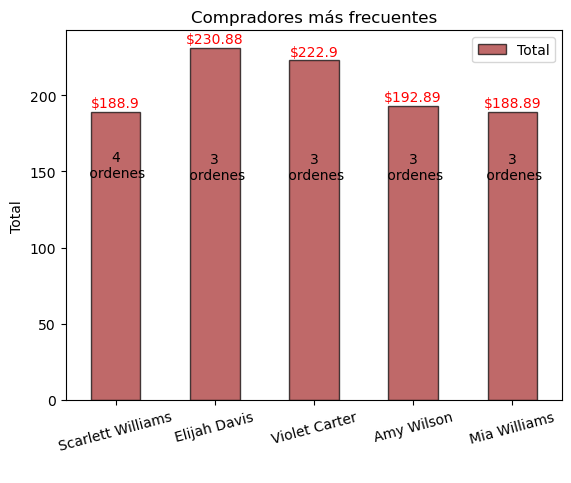

In [20]:
top_buy_count_f = top_buy_count.head(5).copy()
top_buy_count_f['Total'] = top_buy_count_f['Total'].round(2)
ax= top_buy_count_f.plot(kind='bar',x='Name',y='Total',  alpha=0.7, linewidth=1, edgecolor='black', color='brown')
for i, value in enumerate(top_buy_count_f['count']):
    ax.text(i, value + 150, str(value)+'\n ordenes', ha='center', va='center')
    
for i, value in enumerate(top_buy_count_f['Total']):
    ax.text(i, value + 1,"$"+ str(value), ha='center', va='bottom', color='red')

plt.xticks(rotation=15, ha='center')
plt.title('Compradores más frecuentes')
plt.xlabel(' ')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

In [21]:
top_buy = top_buy.sort_values('Total',ascending=False)
top_buy.head()

,Name,Total,count,cust_id
66,Elijah Davis,230.88,3,67
80,Violet Carter,222.90,3,81
108,Javier Santos,201.91,2,109
86,Ryan Reily,194.90,2,87
7,Amy Wilson,192.89,3,8


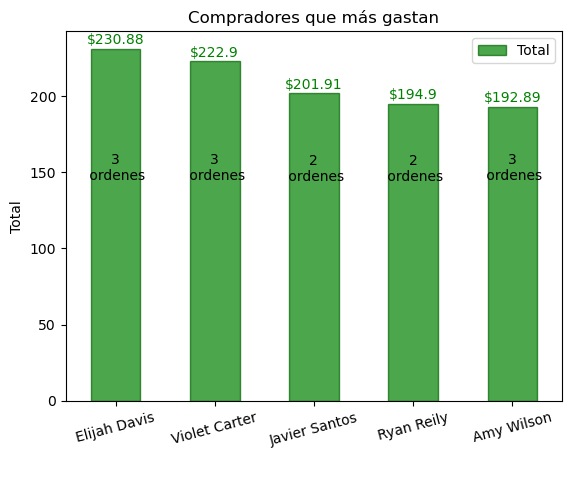

In [22]:
top_buy_f = top_buy.head(5).copy()
top_buy_f['Total'] = top_buy_f['Total'].round(2)
ax= top_buy_f.plot(kind='bar',x='Name',y='Total',  alpha=0.7, linewidth=1, edgecolor='darkgreen', color='green')
for i, value in enumerate(top_buy_f['count']):
    ax.text(i, value + 150, str(value)+'\n ordenes', ha='center', va='center')
    
for i, value in enumerate(top_buy_f['Total']):
    ax.text(i, value + 1,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=15, ha='center')
plt.title('Compradores que más gastan')
plt.xlabel(' ')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

### Como puede ver, Scarlett Williams es nuestra clienta que más veces ha comprado. Sin embargo, tenemos clientes con un mayor consumo en relación con el número de veces que han comprado.

# 

### ¿Cuáles son los productos más vendidos y cuánto dinero han generado?

In [23]:
top_prod = pd.merge(orders,item,on='item_id',how='left')

In [24]:
top_prod['item_price'] = top_prod['item_price'] * top_prod['quantity']
top_prod = top_prod.groupby('item_id',as_index=False)[['item_price','quantity']].sum()

In [25]:
top_prod.rename(columns={'item_price':'total'},inplace=True)

In [26]:
top_prod = pd.merge(top_prod,item,on='item_id',how='left')

In [27]:
top_prod['name'] = top_prod['item_name'] + ' ' +top_prod['item_cat']+ ' ' + top_prod['item_size']
top_prod = top_prod[['item_id','name','quantity','total']]

top_prod = top_prod.sort_values('quantity',ascending=False)

In [28]:
top_prod.head()

,item_id,name,quantity,total
19,it020,Chicken Wings Side Regular,74,813.26
29,it030,Dr Pepper Beverage 2L,54,215.46
23,it024,Pepsi Beverage 2L,41,163.59
9,it010,Donair Pizza Small,39,935.61
24,it025,Diet Pepsi Beverage 2L,36,143.64


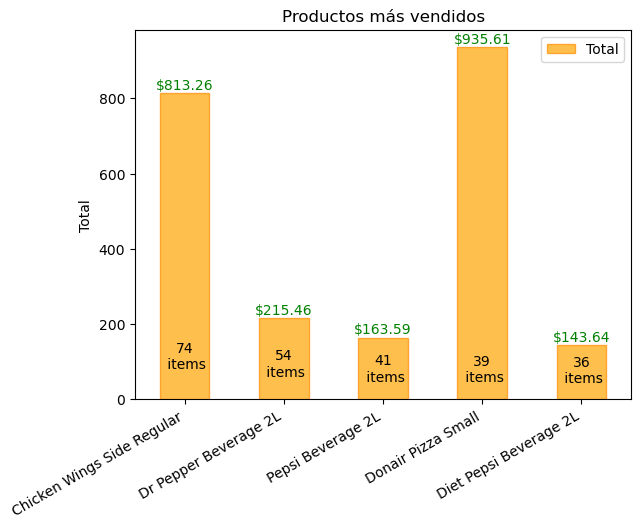

In [29]:
top_prod_f = top_prod.head(5).copy()
top_prod_f['total'] = top_prod_f['total'].round(2)
ax= top_prod_f.plot(kind='bar',x='name',y='total',  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')
for i, value in enumerate(top_prod_f['quantity']):
    ax.text(i, value + 40, str(value)+'\n items', ha='center', va='center')
    
for i, value in enumerate(top_prod_f['total']):
    ax.text(i, value + 3,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Productos más vendidos')
plt.xlabel('')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

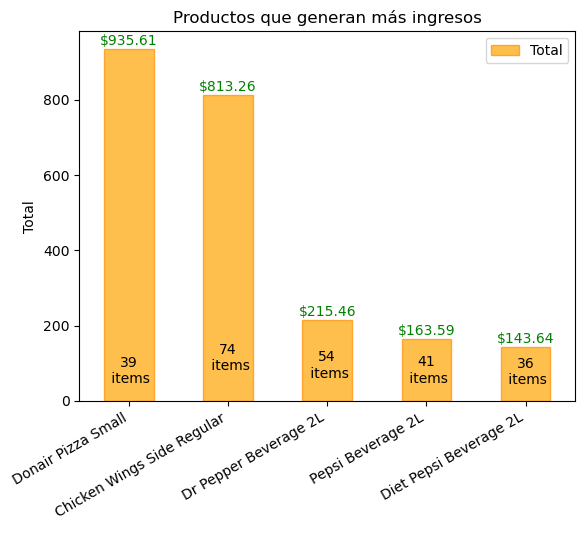

In [30]:
top_prod_m = top_prod.head(5).copy()
top_prod_m = top_prod_m.sort_values('total',ascending=False)
top_prod_m['total'] = top_prod_m['total'].round(2)
ax= top_prod_m.plot(kind='bar',x='name',y='total',  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')
for i, value in enumerate(top_prod_m['quantity']):
    ax.text(i, value + 40, str(value)+'\n items', ha='center', va='center')
    
for i, value in enumerate(top_prod_m['total']):
    ax.text(i, value + 3,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Productos que generan más ingresos')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

### ¿Qué productos se suelen comprar juntos?

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:

basket = (orders.groupby(['order_id', 'item_id'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))


basket_sets = basket.applymap(lambda x: True if x > 0 else False)


frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


sorted_rules = rules.sort_values(by='confidence', ascending=False)
sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
37,"(it022, it018)",(it029),0.064865,1.000000,7.708333
36,"(it022, it029)",(it018),0.064865,0.923077,7.115385
26,"(it020, it005)",(it030),0.054054,0.909091,5.096419
38,"(it029, it018)",(it022),0.064865,0.857143,9.327731
30,"(it014, it024)",(it010),0.054054,0.833333,6.423611
31,"(it014, it010)",(it024),0.054054,0.833333,7.007576
32,"(it024, it010)",(it014),0.054054,0.833333,7.007576
23,(it023),(it028),0.054054,0.769231,6.468531
9,(it012),(it028),0.054054,0.769231,6.468531
20,(it022),(it029),0.070270,0.764706,5.894608


In [33]:
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
sorted_rules['consequents'] = sorted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [34]:
mapping_dict = top_prod.set_index('item_id')['name'].to_dict()

In [35]:
def split_elements(elements_str):
    return elements_str.split(', ')
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(split_elements)

In [36]:
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(', '.join)

In [37]:
sorted_rules[['antecedent_1', 'antecedent_2']] = sorted_rules['antecedents'].str.split(', ', expand=True)
sorted_rules['antecedent_1'] = sorted_rules['antecedent_1'].str.strip()
sorted_rules['antecedent_2'] = sorted_rules['antecedent_2'].str.strip()

sorted_rules['antecedents_names_1'] = sorted_rules['antecedent_1'].map(mapping_dict)
sorted_rules['antecedents_names_2'] = sorted_rules['antecedent_2'].map(mapping_dict)
sorted_rules['consequents_names'] = sorted_rules['consequents'].map(mapping_dict)
sorted_rules['antecedents_names_2'] = sorted_rules['antecedents_names_2'].fillna(' ')

In [38]:
def print_association(row):
    antecedent_1 = row['antecedents_names_1']
    antecedent_2 = row['antecedents_names_2']
    consequent = row['consequents_names']

    if antecedent_2 != " ":
        print(f"{antecedent_1}, {antecedent_2} with {consequent}\n")
    else:
        print(f"{antecedent_1} with {consequent}\n")
print("estos artículos son los que más se compran juntos: \n ")
for index, row in sorted_rules.head(10).iterrows():
    print_association(row)

estos artículos son los que más se compran juntos: 
 
Chocolate Brownie Dessert Regular, Chicken Bacon Ranch Pizza Large with Ginger Ale Beverage 2L

Chocolate Brownie Dessert Regular, Ginger Ale Beverage 2L with Chicken Bacon Ranch Pizza Large

Chicken Wings Side Regular, Pepperoni Pizza Medium with Dr Pepper Beverage 2L

Ginger Ale Beverage 2L, Chicken Bacon Ranch Pizza Large with Chocolate Brownie Dessert Regular

BBQ Chicken Pizza Medium, Pepsi Beverage 2L with Donair Pizza Small

BBQ Chicken Pizza Medium, Donair Pizza Small with Pepsi Beverage 2L

Pepsi Beverage 2L, Donair Pizza Small with BBQ Chicken Pizza Medium

Cheesecake Dessert Regular with Iced Tea Beverage 2L

Donair Pizza Large with Iced Tea Beverage 2L

Chocolate Brownie Dessert Regular with Ginger Ale Beverage 2L



## ⦾ inventario y recetas
### - ¿Qué artículos tienen más disponibilidad y cuáles necesitan ser reabastecidos?

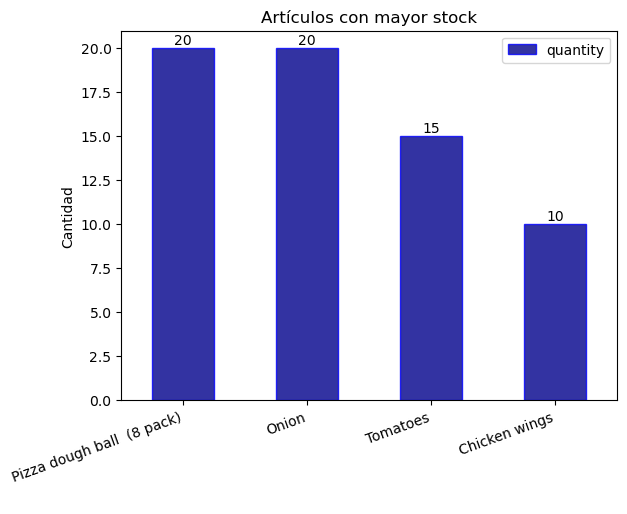

In [39]:
inventory = inventory.sort_values('quantity',ascending=False)
inventory_top = inventory[inventory['quantity'] > 9]
ax = inventory_top.plot(kind='bar',x='ing_name',y='quantity',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')
for i, value in enumerate(inventory_top['quantity']):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=20, ha='right')

plt.title('Artículos con mayor stock')
plt.xlabel(' ')
plt.ylabel('Cantidad')

plt.show()

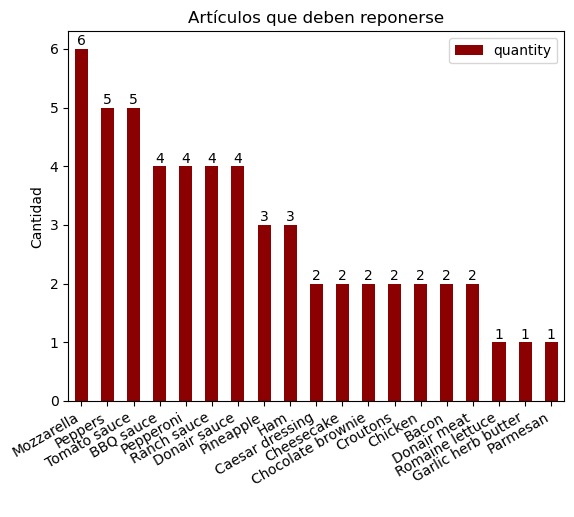

In [40]:
inventory_tail = inventory[inventory['quantity'] <= 9]
ax= inventory_tail.plot(kind='bar',x='ing_name',y='quantity',color='darkred')

for i, value in enumerate(inventory_tail['quantity']):
    ax.text(i, value + 0.01, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=30, ha='right')

plt.title('Artículos que deben reponerse')
plt.xlabel(' ')
plt.ylabel('Cantidad')

plt.show()

#### Artículos con mayor stock:

In [41]:
inventory_top[['ing_name','quantity']]

,ing_name,quantity
0,Pizza dough ball (8 pack),20
9,Onion,20
10,Tomatoes,15
15,Chicken wings,10


#### Artículos para reponer

In [42]:
inventory_tail[['ing_name','quantity']]

,ing_name,quantity
4,Mozzarella,6
13,Peppers,5
1,Tomato sauce,5
21,BBQ sauce,4
5,Pepperoni,4
3,Ranch sauce,4
2,Donair sauce,4
7,Pineapple,3
6,Ham,3
17,Caesar dressing,2


### ¿Cuáles son los ingredientes más utilizados en las recetas y cuál es su coste en proporción al valor del producto?

In [43]:
most_common= recipe['ing_id'].value_counts().reset_index()
most_common = most_common.rename(columns={'index':'ing_id','ing_id':'total'})
most_common = pd.merge(most_common,ingredients,on='ing_id',how='left')

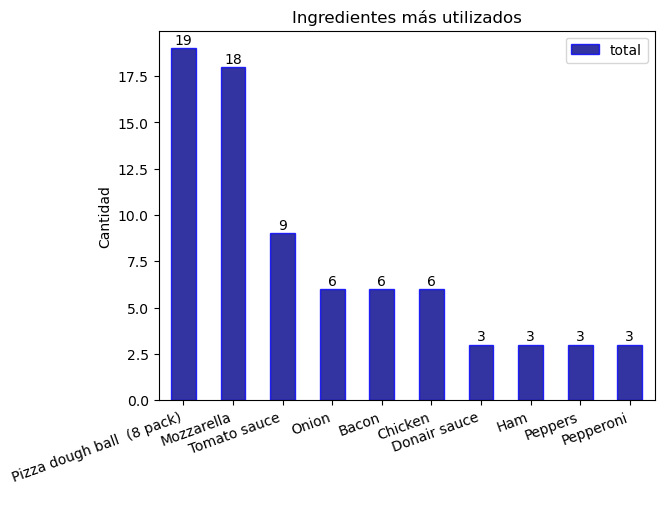

In [44]:
ax = most_common.head(10).plot(kind='bar',x='ing_name',y='total',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')
for i, value in enumerate(most_common.head(10)['total']):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=20, ha='right')

plt.title('Ingredientes más utilizados')
plt.xlabel(' ')
plt.ylabel('Cantidad')

plt.show()

In [45]:
cost_prod = pd.merge(recipe,ingredients,on='ing_id',how='outer')
cost_prod['quantity_price'] = cost_prod['ing_price'] / cost_prod['ing_weight'] * cost_prod['quantity']
cost_prod['quantity_price'] = round(cost_prod['quantity_price'],2)
cost_prod = cost_prod.groupby('recipe_id',as_index=False)['quantity_price'].sum()
cost_prod = cost_prod.rename(columns={'recipe_id':'sku','quantity_price':'prod_price'})
cost_prod = pd.merge(cost_prod,item,on='sku',how='outer')
cost_prod['item'] = cost_prod['item_name'] +" "+ cost_prod['item_cat'] +" "+ cost_prod['item_size']

In [46]:
cost_prod_items = cost_prod[['item','prod_price','item_price']]
cost_prod_items = cost_prod_items.sort_values('item_price',ascending=False)


In [47]:
cost_prod.head()

,sku,prod_price,item_id,item_name,item_cat,item_size,item_price,item
0,DESS-CHBR-R,0.28,it022,Chocolate Brownie,Dessert,Regular,8.99,Chocolate Brownie Dessert Regular
1,DESS-CHCA-R,0.28,it023,Cheesecake,Dessert,Regular,8.99,Cheesecake Dessert Regular
2,PIZZ-BBQC-L,4.46,it015,BBQ Chicken,Pizza,Large,35.99,BBQ Chicken Pizza Large
3,PIZZ-BBQC-M,3.86,it014,BBQ Chicken,Pizza,Medium,29.99,BBQ Chicken Pizza Medium
4,PIZZ-BBQC-S,3.28,it013,BBQ Chicken,Pizza,Small,23.99,BBQ Chicken Pizza Small


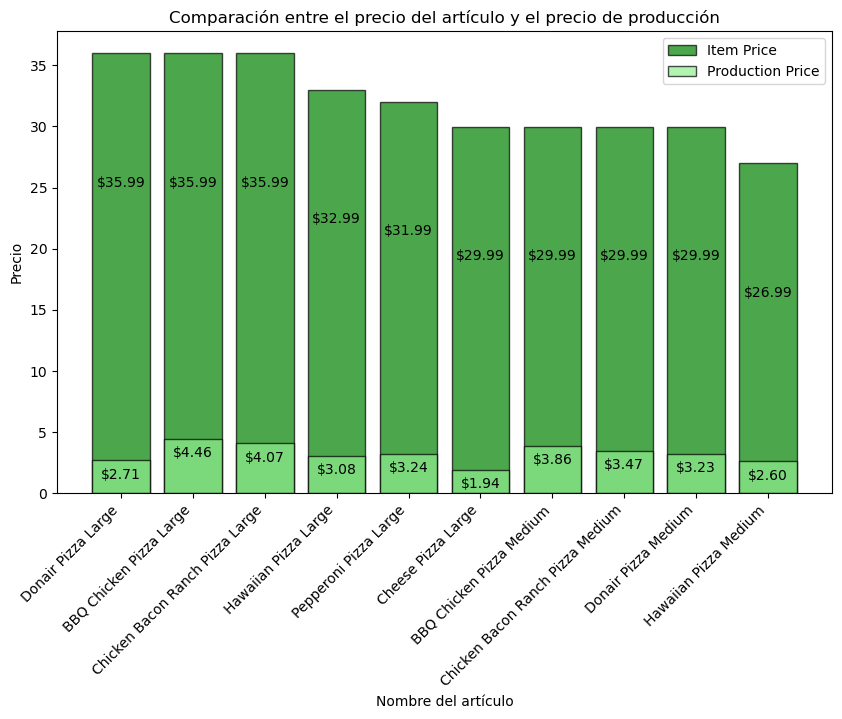

In [48]:
plt.figure(figsize=(10, 6))

plt.bar(cost_prod_items['item'].head(10), cost_prod_items['item_price'].head(10), color='green',alpha=0.7, edgecolor='black', label='Item Price')

plt.bar(cost_prod_items['item'].head(10), cost_prod_items['prod_price'].head(10), color='lightgreen', alpha=0.7, edgecolor='black', label='Production Price')

plt.xlabel('Nombre del artículo')
plt.ylabel('Precio')
plt.title('Comparación entre el precio del artículo y el precio de producción')
plt.legend()

for i, value in enumerate(cost_prod_items['item_price'].head(10)):
    plt.text(i, value -10, f'${value:.2f}', ha='center', va='top', color='black', fontsize=10)

for i, value in enumerate(cost_prod_items['prod_price'].head(10)):
    plt.text(i, value + -0.6, f'${value:.2f}', ha='center', va='top', color='black', fontsize=10)


plt.xticks(rotation=45, ha='right')

plt.show()

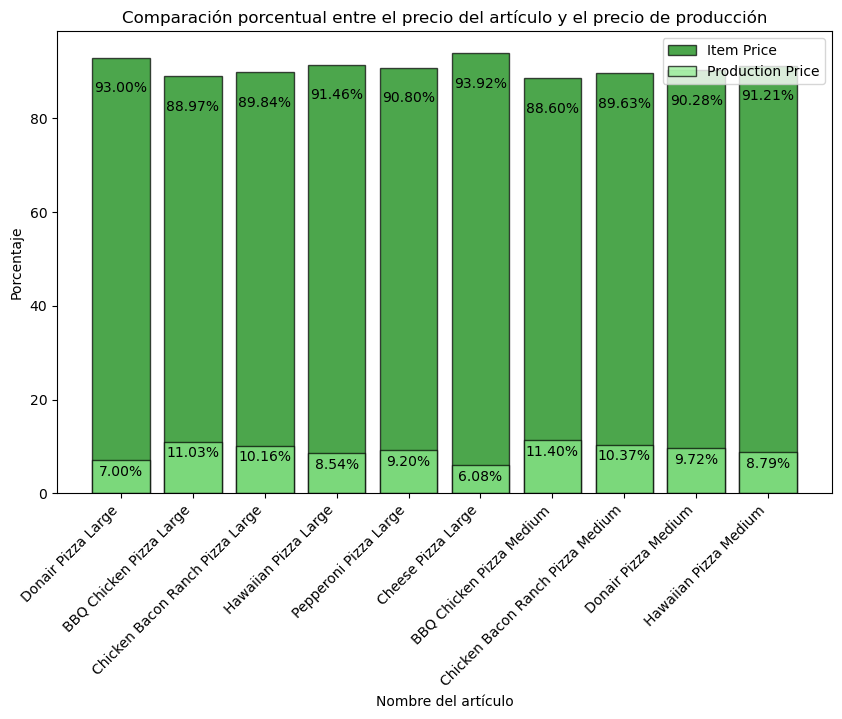

In [49]:
total_price = cost_prod_items['item_price'].head(10) + cost_prod_items['prod_price'].head(10)
item_percentages = (cost_prod_items['item_price'].head(10) / total_price) * 100
prod_percentages = (cost_prod_items['prod_price'].head(10) / total_price) * 100

plt.figure(figsize=(10, 6))

plt.bar(cost_prod_items['item'].head(10), item_percentages, color='green', alpha=0.7, edgecolor='black', label='Item Price')

plt.bar(cost_prod_items['item'].head(10), prod_percentages, color='lightgreen', alpha=0.7, edgecolor='black', label='Production Price')

plt.xlabel('Nombre del artículo')
plt.ylabel('Porcentaje')
plt.title('Comparación porcentual entre el precio del artículo y el precio de producción')
plt.legend()


for i, value in enumerate(item_percentages):
    plt.text(i, value - 5, f'{value:.2f}%', ha='center', va='top', color='black', fontsize=10)

for i, value in enumerate(prod_percentages):
    plt.text(i, value - 4, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)


plt.xticks(rotation=45, ha='right')


plt.show()

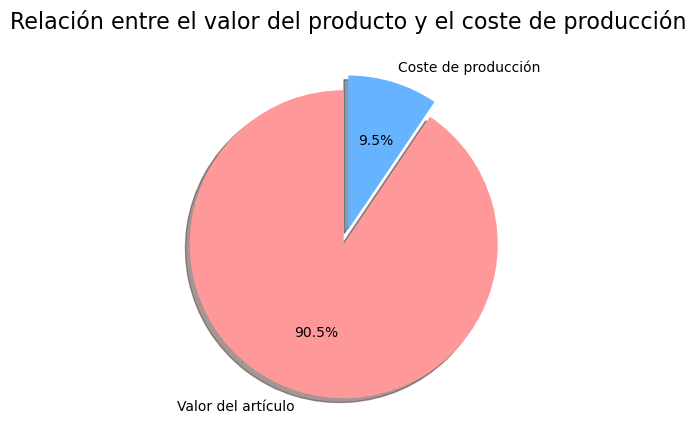

In [50]:
filter_beverage = cost_prod_items['item'].str.contains('2L', case=False)

cost_prod_items = cost_prod_items[~filter_beverage]

total_price = cost_prod_items['item_price'].sum()
total_prod = cost_prod_items['prod_price'].sum()


percentage_price = (cost_prod_items['item_price'].sum() / (total_price + total_prod)) * 100
percentage_prod = (cost_prod_items['prod_price'].sum() / (total_price + total_prod)) * 100


labels = ['Valor del artículo', 'Coste de producción']
sizes = [percentage_price, percentage_prod]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 


plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)


plt.title('Relación entre el valor del producto y el coste de producción', fontsize=16)


plt.show()

#### Este elevado margen de beneficios indica que es posible mantener el negocio a largo plazo siguiendo estrategias de marketing y fijación de precios, como descuentos o promociones, aunque también hay que tener en cuenta los costes de mantenimiento y personal.

## ⦾ Rendimiento del personal
### - ¿Cómo varía el rendimiento del personal en los distintos días de la semana y turnos?

In [51]:
performance = orders[['order_id','created_at','delivery']]
performance = performance.drop_duplicates(subset=['order_id'])
performance['created_at'] = pd.to_datetime(performance['created_at'])
performance['day'] = performance['created_at'].dt.day_name()
performance['hour'] = performance['created_at'].dt.strftime('%H:%M')

In [52]:
performance['hour'] = pd.to_datetime(performance['hour']).dt.time
shift['start_time'] = pd.to_datetime(shift['start_time']).dt.time
shift['end_time'] = pd.to_datetime(shift['end_time']).dt.time

In [53]:
def asign_shift(row):
    shift_id = shift.loc[(shift['day_of_week'] == row['day']) & (shift['start_time'] <= row['hour']) & (shift['end_time'] > row['hour']), 'shift_id'].values
    return shift_id[0] if len(shift_id) > 0 else None

performance['shift_id'] = performance.apply(asign_shift, axis=1)

In [54]:
performance['date'] = performance['created_at'].dt.date
performance = performance.drop(columns=['created_at'])

In [55]:
performance['date'] = pd.to_datetime(performance['date'])
rota['date'] = pd.to_datetime(rota['date'])
performance = pd.merge(performance,rota,on=['date','shift_id'], how='left')

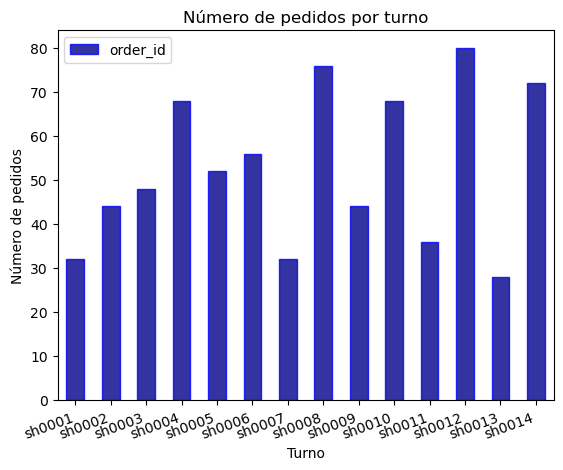

In [56]:
order_counts = performance.groupby('shift_id')['order_id'].count().reset_index()

ax = order_counts.plot(kind='bar', x='shift_id', y='order_id', alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.xticks(rotation=20, ha='right')
plt.xlabel('Turno')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por turno')
plt.show()

#### como puede verse, los turnos de tarde tienen una mayor demanda de pedidos de compra (los turnos pares).

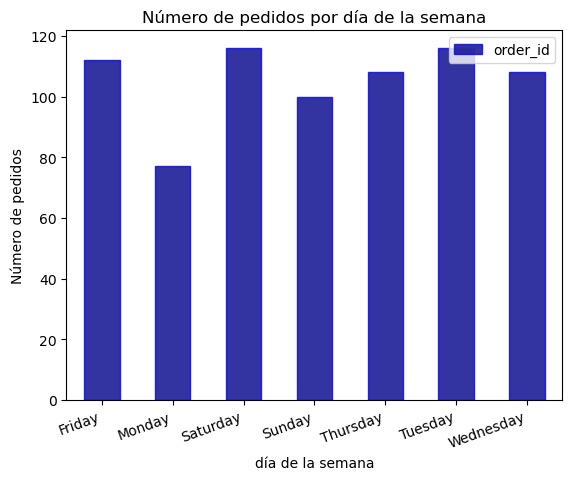

In [57]:
order_counts = performance.groupby('day')['order_id'].count().reset_index()

ax = order_counts.plot(kind='bar', x='day', y='order_id', alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.xticks(rotation=20, ha='right')
plt.xlabel('día de la semana')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por día de la semana')
plt.show()

#### Los lunes son los días de menos ventas. Estos datos serán útiles para generar un análisis completo de los costes e ingresos de la pizzería.

### ¿Cuáles son los costes laborales por turno?

In [58]:
cpf = performance[performance['shift_id']=='sh0001']

In [59]:
cpf = pd.merge(rota,staff,on='staff_id',how='outer')

In [60]:
cpf = cpf[(cpf['rota_id'] == 'ro0001') & (cpf['shift_id'] == 'sh0011') & (cpf['date'] == '2024-01-13')]

In [61]:
shift_dur = datetime.combine(datetime.min, shift['end_time'].iloc[0]) - datetime.combine(datetime.min, shift['start_time'].iloc[0])

In [62]:
result = shift_dur.total_seconds() / 3600

In [63]:
cpf['total_per_shift'] = round(cpf['hourly_rate'] * result,2)

In [64]:
total_cost = round(cpf['total_per_shift'].sum(),2)

In [65]:
print(f"Costes laborales totales por turno  ${total_cost}")
print(f"Costes laborales totales por día ${total_cost *2}")
print(f"Costes laborales totales por semana ${total_cost *14}")
print(f"Costes laborales totales al mes ${total_cost *60}")

Costes laborales totales por turno  $440.37
Costes laborales totales por día $880.74
Costes laborales totales por semana $6165.18
Costes laborales totales al mes $26422.2


## ⦾ Rentabilidad de la pizzería
### - Ingresos totales en la pizzería

In [66]:
total_income = top_prod['total'].sum()

In [67]:
print(f"los ingresos totales de la pizzería son ${round(total_income,2)}")

los ingresos totales de la pizzería son $10450.27


### - Beneficios diarios, semanales y totales

In [68]:
profits = pd.merge(pd.merge(orders,item,on='item_id',how='left'),cost_prod,on='item_id',how='left')
profits['prod_price'] = profits['prod_price'].fillna(0)
profits['total_price'] = (profits['item_price_x'] - profits['prod_price']) * profits['quantity']
profits = profits[['created_at','total_price']]

In [69]:
profits['created_at'] = pd.to_datetime(profits['created_at'])
profits['day_of_week'] = profits['created_at'].dt.day_name()
profits['week_number'] = profits['created_at'].dt.isocalendar().week

In [70]:
profits['week_number'] = profits['week_number'] - 1
profits['created_at'] = profits['created_at'].dt.date

In [71]:
profits_daily = profits.groupby('created_at',as_index=False)['total_price'].sum()
profits_weekly = profits.groupby('week_number',as_index=False)['total_price'].sum()

In [72]:
profits_daily['daily_labor_cost'] = total_cost *2
profits_weekly['weekly_labor_cost'] = total_cost * 14

In [73]:
profits_daily = profits_daily.drop_duplicates('total_price')

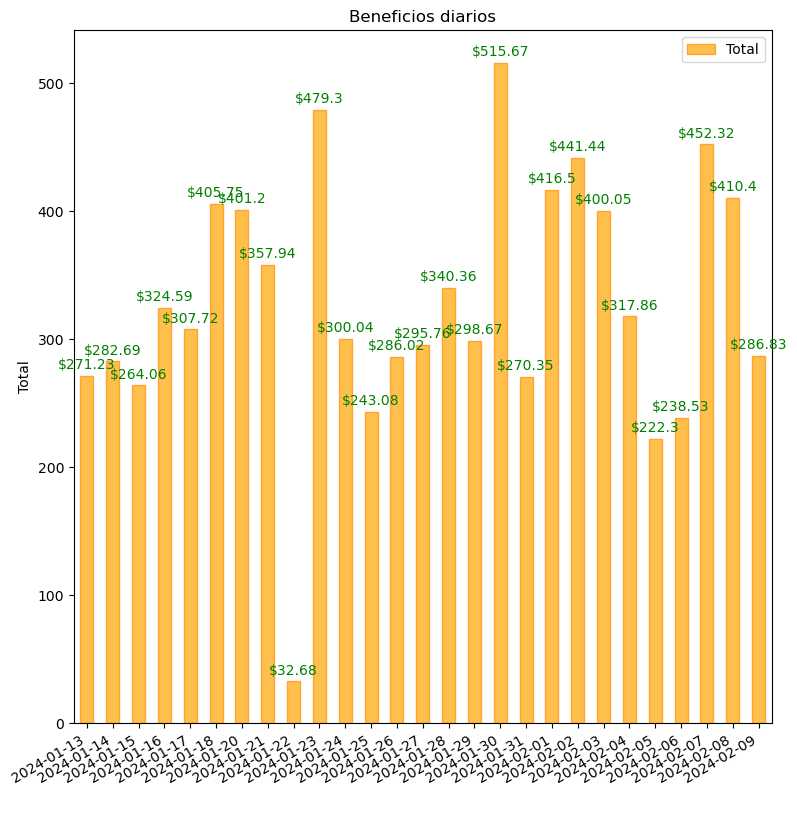

In [74]:
fig,ax= plt.subplots(figsize=(9,9))
profits_daily.plot(kind='bar',x='created_at',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(profits_daily['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Beneficios diarios')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

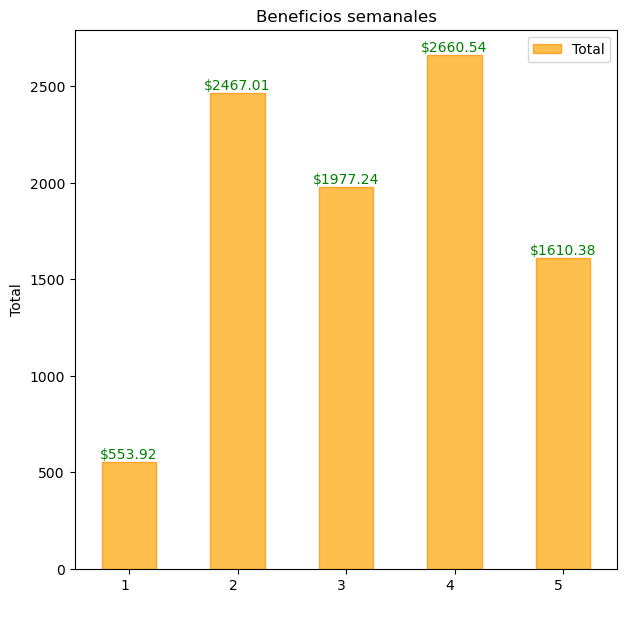

In [75]:
fig,ax= plt.subplots(figsize=(7,7))
profits_weekly.plot(kind='bar',x='week_number',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(profits_weekly['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=0, ha='right')
plt.title('Beneficios semanales')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

### El beneficio obtenido por la venta de los productos se obtiene deduciendo el coste de producción de los mismos. Sin embargo, el coste de personal por día es muy superior al beneficio obtenido. 

### A partir de los datos analizados, veremos si las siguientes decisiones pueden reducir la diferencia entre el beneficio de la tienda y los costes salariales: 
### -Reducir las jornadas laborales y abrir la pizzería sólo los días en los que suele haber más demanda.
### - Reducir el horario para tener un solo turno en lugar de dos al día.

### Primero, veamos cuáles son las horas de mayor venta.

In [76]:
reduced = pd.merge(pd.merge(orders,item,on='item_id',how='left'),cost_prod,on='item_id',how='left')

In [77]:
reduced['prod_price'] = reduced['prod_price'].fillna(0)
reduced['total_price'] = (reduced['item_price_x'] - reduced['prod_price']) * reduced['quantity']
reduced['created_at'] = pd.to_datetime(reduced['created_at'])
reduced['day_of_week'] = reduced['created_at'].dt.day_name()
reduced['week_number'] = reduced['created_at'].dt.isocalendar().week
reduced['week_number'] = reduced['week_number'] - 1
reduced['date'] = reduced['created_at'].dt.date
reduced['time'] = reduced['created_at'].dt.time

In [78]:
reduced= reduced[['order_id','date','time','total_price','day_of_week','week_number']]

In [79]:
reduced['hour'] = reduced['time'].apply(lambda x: x.hour)

In [80]:
reduced_h = reduced.groupby('hour',as_index=False)['total_price'].sum()

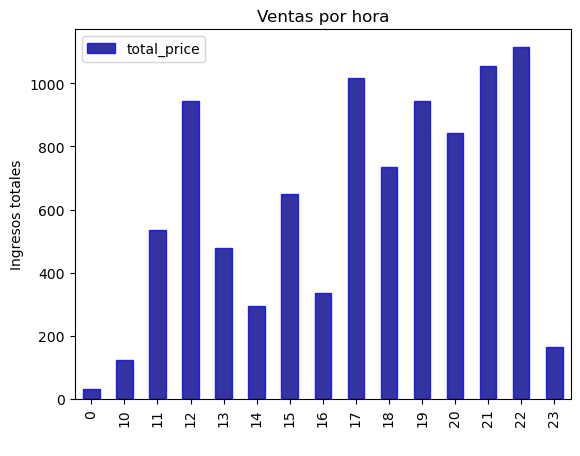

In [81]:
ax = reduced_h.plot(kind='bar',x='hour',y='total_price',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.title('Sales per Hour')
plt.xlabel(' ')
plt.ylabel('Total income')

plt.show()

### Aunque se pierde una hora punta de ventas para la pizzería, es posible reducir un turno y abrir sólo por la tarde y tener el horario de 17 a 23 horas.
### Además, como vimos en un gráfico anterior, los lunes son los días con menos ventas, por lo que se puede eliminar este día para evaluar cómo afecta a los costes salariales de los empleados.

## Veamos los resultados de estas medidas

In [82]:
reduced = reduced.loc[reduced['day_of_week'] != 'Monday']
reduced['time'] = pd.to_datetime(reduced['time'], format='%H:%M:%S').dt.time
reduced = reduced.loc[(reduced['time'] >= pd.to_datetime('17:00:00').time()) & (reduced['time'] <= pd.to_datetime('23:00:00').time())]

In [83]:
reduced_daily = reduced.groupby('date',as_index=False)['total_price'].sum()
reduced_weekly = reduced.groupby('week_number',as_index=False)['total_price'].sum()

In [84]:
reduced_daily = reduced_daily.drop_duplicates('total_price')

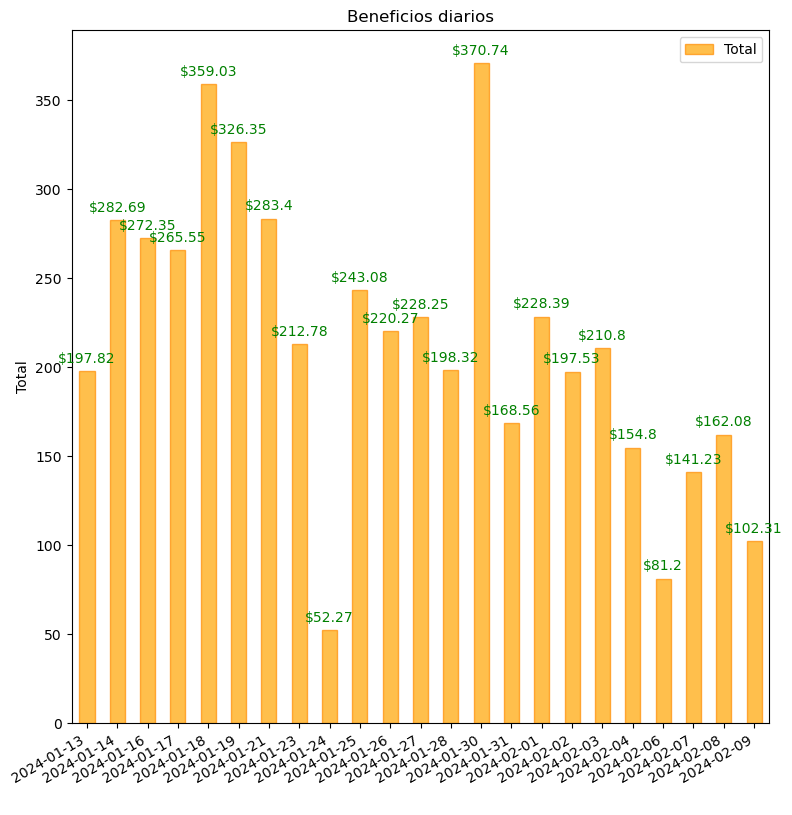

In [85]:
fig,ax= plt.subplots(figsize=(9,9))
reduced_daily.plot(kind='bar',x='date',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(reduced_daily['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Beneficios diarios')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

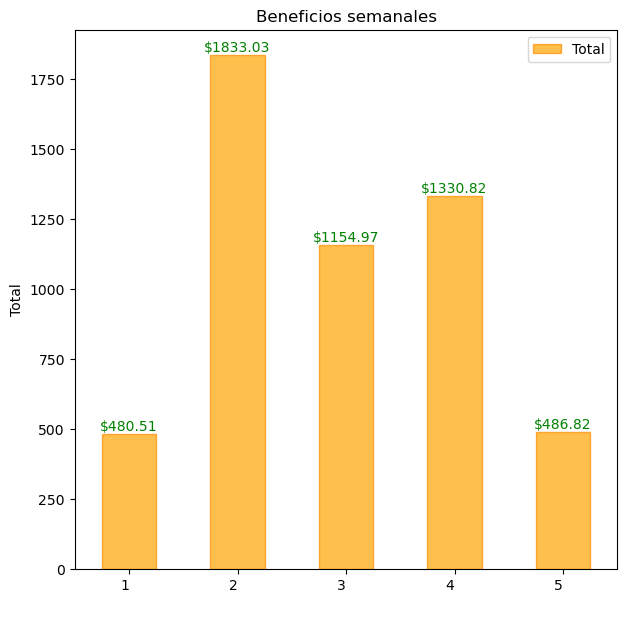

In [86]:
fig,ax= plt.subplots(figsize=(7,7))
reduced_weekly.plot(kind='bar',x='week_number',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(reduced_weekly['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=0, ha='right')
plt.title('Beneficios semanales')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

#### la primera semana sólo tiene dos días de seis y la última semana cuatro de seis.

In [87]:
cpf['total_per_shift'] = round(cpf['hourly_rate'] * 6,2)

total_cost_red = round(cpf['total_per_shift'].sum(),2)

print(f"Costes laborales totales por turno/día ${total_cost_red}")


print(f"Costes laborales totales por semana ${total_cost_red *7}")
print(f"Costes laborales totales al mes ${total_cost_red *30}")

Costes laborales totales por turno/día $406.5
Costes laborales totales por semana $2845.5
Costes laborales totales al mes $12195.0


In [88]:
print(f"Ingresos totales de la pizzería con costes reducidos: {round(reduced['total_price'].sum(),2)} ")

Ingresos totales de la pizzería con costes reducidos: 5286.15 


## Aunque la diferencia entre los ingresos totales y los costes de los empleados se ha reducido, sigue siendo más del doble y la pizzería no es rentable. 

## Teniendo en cuenta los precios de la competencia, merece la pena plantearse subir los precios o reducir el número de empleados si es posible. Al mismo tiempo, hay que buscar estrategias de marketing para aumentar las ventas, como ofrecer promociones para los productos que se venden juntos con más frecuencia, como vimos en uno de los puntos anteriores.